# Homework 2
## Abayomi Koyejo
### Petroleum Engineering

In [1]:
#importing requirements
import numpy as np
import pandas as pd
import seaborn as sns
sns.set()
from matplotlib import pyplot as plt
%matplotlib inline

In [2]:
#loading data and adding columns
data=pd.read_table("drug_consumption.data", sep=',',header=None,names=["ID","Age","Gender","Education","Country","Ethnicity","Nscore","Escore","Oscore","Ascore","Cscore","Impulsive","SS","Alcohol","Amphet","Amyl","Benzos","Caff","Cannabis","Choc","Coke","Crack","Ecstacy","Heroin","Ketamine","Legalh","LSD","Meth","Mushroom","Nicotine","Semer","VSA"])

In [3]:
data.head()
# After reading problem description i understood my imputs to be the  Age, Gender, Education, Country and personality trait scores while the output are the drugs
# I will clean the data now and split into imput and outputs after that

,ID,Age,Gender,Education,Country,Ethnicity,Nscore,Escore,Oscore,Ascore,...,Ecstacy,Heroin,Ketamine,Legalh,LSD,Meth,Mushroom,Nicotine,Semer,VSA
0,1,0.49788,0.48246,-0.05921,0.96082,0.12600,0.31287,-0.57545,-0.58331,-0.91699,...,CL0,CL0,CL0,CL0,CL0,CL0,CL0,CL2,CL0,CL0
1,2,-0.07854,-0.48246,1.98437,0.96082,-0.31685,-0.67825,1.93886,1.43533,0.76096,...,CL4,CL0,CL2,CL0,CL2,CL3,CL0,CL4,CL0,CL0
2,3,0.49788,-0.48246,-0.05921,0.96082,-0.31685,-0.46725,0.80523,-0.84732,-1.62090,...,CL0,CL0,CL0,CL0,CL0,CL0,CL1,CL0,CL0,CL0
3,4,-0.95197,0.48246,1.16365,0.96082,-0.31685,-0.14882,-0.80615,-0.01928,0.59042,...,CL0,CL0,CL2,CL0,CL0,CL0,CL0,CL2,CL0,CL0
4,5,0.49788,0.48246,1.98437,0.96082,-0.31685,0.73545,-1.63340,-0.45174,-0.30172,...,CL1,CL0,CL0,CL1,CL0,CL0,CL2,CL2,CL0,CL0


## Dataset Preparation

In [4]:
#here i try to map the the values to the gender but the real value is a little off. so i check location to get the full value and put it in my mapping  
data["Gender"].iloc[1]


-0.48246000000000006

In [5]:
data['Gender'] = data['Gender'].apply(lambda gender :
                      'Female' if gender == 0.48246000000000006 else 'Male')

In [6]:
data["Gender"].head()

0    Female
1      Male
2      Male
3    Female
4    Female
Name: Gender, dtype: object

In [7]:
data['Age'] = data['Age'].apply( lambda age : '18-24' if age == -0.9519700000000001 else '25-34' if age == -0.07854
                                else '35-44' if age == 0.49788000000000004
                                else '45-54' if age == 1.09449
                                else '55-64' if age == 1.82213
                                else  '65+' if age == 2.59171
                                else None)


In [8]:
data['Age'].head()

0    35-44
1    25-34
2    35-44
3    18-24
4    35-44
Name: Age, dtype: object

In [9]:
data['Education'] = data['Education'].apply( lambda edu : 'Left before 18' if edu == -2.43591 else 'Left before 18' if edu == -1.7379 else 'Left before 18' if edu == -1.43719  else 'Left at 18' if edu == -1.22751
                                else 'Some College' if edu == -0.6111300000000001
                                else 'Certificate' if edu == -0.059210000000000006
                                else  'University' if edu ==0.45468000000000003 else 'Masters' if edu == 1.16365 else 'PhD' if edu == 1.98437
                                else None)

In [10]:
data['Education'].head()

0    Certificate
1            PhD
2    Certificate
3        Masters
4            PhD
Name: Education, dtype: object

In [11]:
data['Country'] = data.Country.apply(lambda cont : 'Australia' if cont == -0.09765 else 'Republc of Ireland' if cont == 0.21128
                                else 'Canada' if cont == 0.24923
                                else 'New Zealand' if cont == -0.46841
                                else  'Others' if cont == -0.28519 else 'UK' if cont == 0.9608200000000001 else 'USA' if cont == -0.57009
                                else None)


In [12]:
data['Country'].head(10)

0        UK
1        UK
2        UK
3        UK
4        UK
5    Canada
6       USA
7        UK
8    Canada
9        UK
Name: Country, dtype: object

In [13]:
data['Ethnicity'] = data.Ethnicity.apply(lambda eth : 'Asian' if eth == -0.502120 else 'Black' if eth == -1.1070200000000001
                                else 'Black/Asian' if eth == 1.907250
                                else 'White/Asian' if eth == 0.12600
                                else  'White/Black' if eth == -0.22166 else 'Others' if eth == 0.11440 else 'White' if eth == -0.31685
                                else None)

In [14]:
data['Ethnicity'].head()

0    White/Asian
1          White
2          White
3          White
4          White
Name: Ethnicity, dtype: object

In [15]:
data.head()


,ID,Age,Gender,Education,Country,Ethnicity,Nscore,Escore,Oscore,Ascore,...,Ecstacy,Heroin,Ketamine,Legalh,LSD,Meth,Mushroom,Nicotine,Semer,VSA
0,1,35-44,Female,Certificate,UK,White/Asian,0.31287,-0.57545,-0.58331,-0.91699,...,CL0,CL0,CL0,CL0,CL0,CL0,CL0,CL2,CL0,CL0
1,2,25-34,Male,PhD,UK,White,-0.67825,1.93886,1.43533,0.76096,...,CL4,CL0,CL2,CL0,CL2,CL3,CL0,CL4,CL0,CL0
2,3,35-44,Male,Certificate,UK,White,-0.46725,0.80523,-0.84732,-1.62090,...,CL0,CL0,CL0,CL0,CL0,CL0,CL1,CL0,CL0,CL0
3,4,18-24,Female,Masters,UK,White,-0.14882,-0.80615,-0.01928,0.59042,...,CL0,CL0,CL2,CL0,CL0,CL0,CL0,CL2,CL0,CL0
4,5,35-44,Female,PhD,UK,White,0.73545,-1.63340,-0.45174,-0.30172,...,CL1,CL0,CL0,CL1,CL0,CL0,CL2,CL2,CL0,CL0


In [16]:
data["Age"] = data.Age.map({'18-24':0, '25-34':1,'35-44':2, '45-54':3, '55-64':4, '65+':5})
#data["Gender"] = data.Gender.map({'Female':0, 'Male':1})
data["Education"] = data.Education.map({'Left before 18':0, 'Left at 18':1, 'Some College':2, 'Certificate':3, 'University':4, 'Masters':5, 'PhD':6})
data = pd.get_dummies(data, dummy_na=False, columns=['Gender'])
#encoding categorical data to numeric for Age and Education and getting dummies for gender

In [17]:
data.head()

,ID,Age,Education,Country,Ethnicity,Nscore,Escore,Oscore,Ascore,Cscore,...,Ketamine,Legalh,LSD,Meth,Mushroom,Nicotine,Semer,VSA,Gender_Female,Gender_Male
0,1,2,3,UK,White/Asian,0.31287,-0.57545,-0.58331,-0.91699,-0.00665,...,CL0,CL0,CL0,CL0,CL0,CL2,CL0,CL0,1,0
1,2,1,6,UK,White,-0.67825,1.93886,1.43533,0.76096,-0.14277,...,CL2,CL0,CL2,CL3,CL0,CL4,CL0,CL0,0,1
2,3,2,3,UK,White,-0.46725,0.80523,-0.84732,-1.62090,-1.01450,...,CL0,CL0,CL0,CL0,CL1,CL0,CL0,CL0,0,1
3,4,0,5,UK,White,-0.14882,-0.80615,-0.01928,0.59042,0.58489,...,CL2,CL0,CL0,CL0,CL0,CL2,CL0,CL0,1,0
4,5,2,6,UK,White,0.73545,-1.63340,-0.45174,-0.30172,1.30612,...,CL0,CL1,CL0,CL0,CL2,CL2,CL0,CL0,1,0


In [18]:
# All done now i create input(X) and output(drug) dataframes

In [19]:
X = data[['Age', 'Gender_Male', 'Gender_Female', 'Education', 'Nscore', 'Escore', 'Oscore', 'Ascore', 'Cscore', 'Impulsive', 'SS']]
X.head()
# Dropped ID, Country and Ethnicity. Ethnicity highly skwed towards white(91%) and ID and country arent really a big decider in this case 

,Age,Gender_Male,Gender_Female,Education,Nscore,Escore,Oscore,Ascore,Cscore,Impulsive,SS
0,2,0,1,3,0.31287,-0.57545,-0.58331,-0.91699,-0.00665,-0.21712,-1.18084
1,1,1,0,6,-0.67825,1.93886,1.43533,0.76096,-0.14277,-0.71126,-0.21575
2,2,1,0,3,-0.46725,0.80523,-0.84732,-1.62090,-1.01450,-1.37983,0.40148
3,0,0,1,5,-0.14882,-0.80615,-0.01928,0.59042,0.58489,-1.37983,-1.18084
4,2,0,1,6,0.73545,-1.63340,-0.45174,-0.30172,1.30612,-0.21712,-0.21575


In [20]:
drug = data[["Alcohol","Amphet","Amyl","Benzos","Caff","Cannabis","Choc","Coke","Crack","Ecstacy","Heroin","Ketamine","Legalh","LSD","Meth","Mushroom","Nicotine","Semer","VSA"]]
drug.head()
#ml algos cannot deal with str so i encode drug values

,Alcohol,Amphet,Amyl,Benzos,Caff,Cannabis,Choc,Coke,Crack,Ecstacy,Heroin,Ketamine,Legalh,LSD,Meth,Mushroom,Nicotine,Semer,VSA
0,CL5,CL2,CL0,CL2,CL6,CL0,CL5,CL0,CL0,CL0,CL0,CL0,CL0,CL0,CL0,CL0,CL2,CL0,CL0
1,CL5,CL2,CL2,CL0,CL6,CL4,CL6,CL3,CL0,CL4,CL0,CL2,CL0,CL2,CL3,CL0,CL4,CL0,CL0
2,CL6,CL0,CL0,CL0,CL6,CL3,CL4,CL0,CL0,CL0,CL0,CL0,CL0,CL0,CL0,CL1,CL0,CL0,CL0
3,CL4,CL0,CL0,CL3,CL5,CL2,CL4,CL2,CL0,CL0,CL0,CL2,CL0,CL0,CL0,CL0,CL2,CL0,CL0
4,CL4,CL1,CL1,CL0,CL6,CL3,CL6,CL0,CL0,CL1,CL0,CL0,CL1,CL0,CL0,CL2,CL2,CL0,CL0


In [21]:
drug_use = {"CL0": 0, "CL1": 1, "CL2":2, "CL3":3, "CL4":4, "CL5":5, "CL6":6}
drug.replace(drug_use, inplace=True)
#0 - never used, 1 - used over a decade ago, 2 - used in last decade, 3 - used in last year, 4 - used in last month, 5 - used in last week, 6 - used in last day 

/home/yomi/anaconda3/lib/python3.6/site-packages/pandas/core/frame.py:3798: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  method=method)


In [22]:
drug.info()
#no Nans all data processed

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1885 entries, 0 to 1884
Data columns (total 19 columns):
Alcohol     1885 non-null int64
Amphet      1885 non-null int64
Amyl        1885 non-null int64
Benzos      1885 non-null int64
Caff        1885 non-null int64
Cannabis    1885 non-null int64
Choc        1885 non-null int64
Coke        1885 non-null int64
Crack       1885 non-null int64
Ecstacy     1885 non-null int64
Heroin      1885 non-null int64
Ketamine    1885 non-null int64
Legalh      1885 non-null int64
LSD         1885 non-null int64
Meth        1885 non-null int64
Mushroom    1885 non-null int64
Nicotine    1885 non-null int64
Semer       1885 non-null int64
VSA         1885 non-null int64
dtypes: int64(19)
memory usage: 279.9 KB


In [23]:
drug.head()
#data preprocesed. Moving on to visualization

,Alcohol,Amphet,Amyl,Benzos,Caff,Cannabis,Choc,Coke,Crack,Ecstacy,Heroin,Ketamine,Legalh,LSD,Meth,Mushroom,Nicotine,Semer,VSA
0,5,2,0,2,6,0,5,0,0,0,0,0,0,0,0,0,2,0,0
1,5,2,2,0,6,4,6,3,0,4,0,2,0,2,3,0,4,0,0
2,6,0,0,0,6,3,4,0,0,0,0,0,0,0,0,1,0,0,0
3,4,0,0,3,5,2,4,2,0,0,0,2,0,0,0,0,2,0,0
4,4,1,1,0,6,3,6,0,0,1,0,0,1,0,0,2,2,0,0


## Exploratory analysis

#### Lets start with the inputs and see if we can find anything interesting.

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7fa6288cdd30>,
      dtype=object)

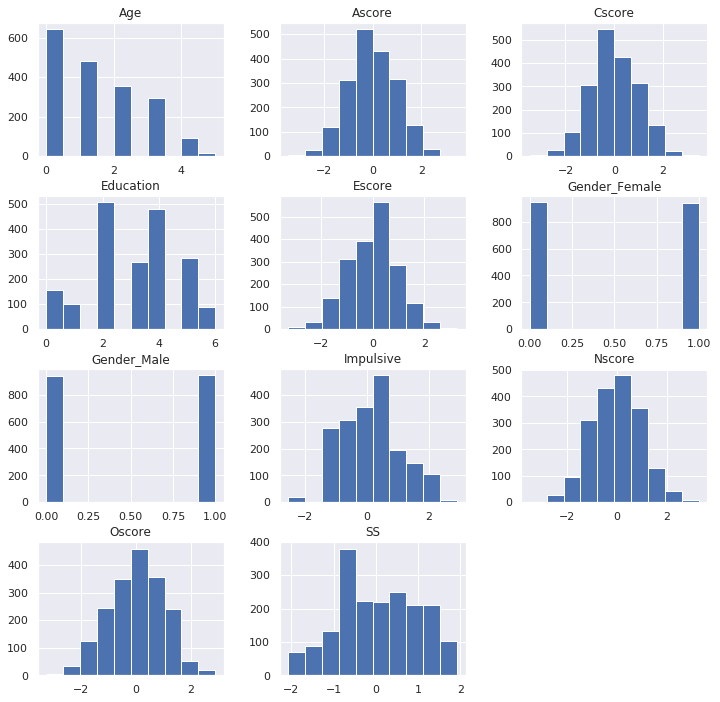

In [24]:
X.hist(figsize=(12,12))
#Visualizing whole dataset shows sitribution of test subjecyts with '18-24' and '25-34' dominating. For education some college and university degree.

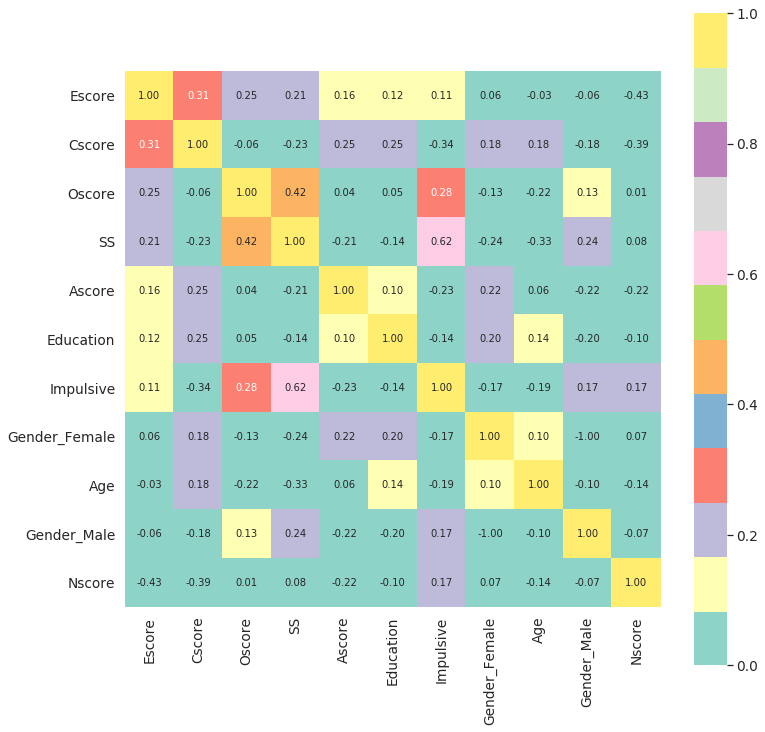

In [25]:
corrmap = X.corr()
k = 11
cols = corrmap.nlargest(k, 'Escore')['Nscore'].index
x_d = X[cols].corr()

plt.figure(figsize=(12,12))

sns.set(font_scale=1.25)
hm = sns.heatmap(x_d,cmap = 'Set3', cbar=True, annot=True,vmin=0,vmax =1, square=True, fmt='.2f', annot_kws={'size': 10},
                 yticklabels = cols.values, xticklabels = cols.values)
plt.show()

#I check correlation with the heat map of the data set. The extraversion score strongly correlates with conscientiousness; impulsiveness with openess to experience; Sensation seeing and openess  

In [26]:
# going on to analyse the drugs

Text(0.5, 1.0, 'Drug use distribution by time')

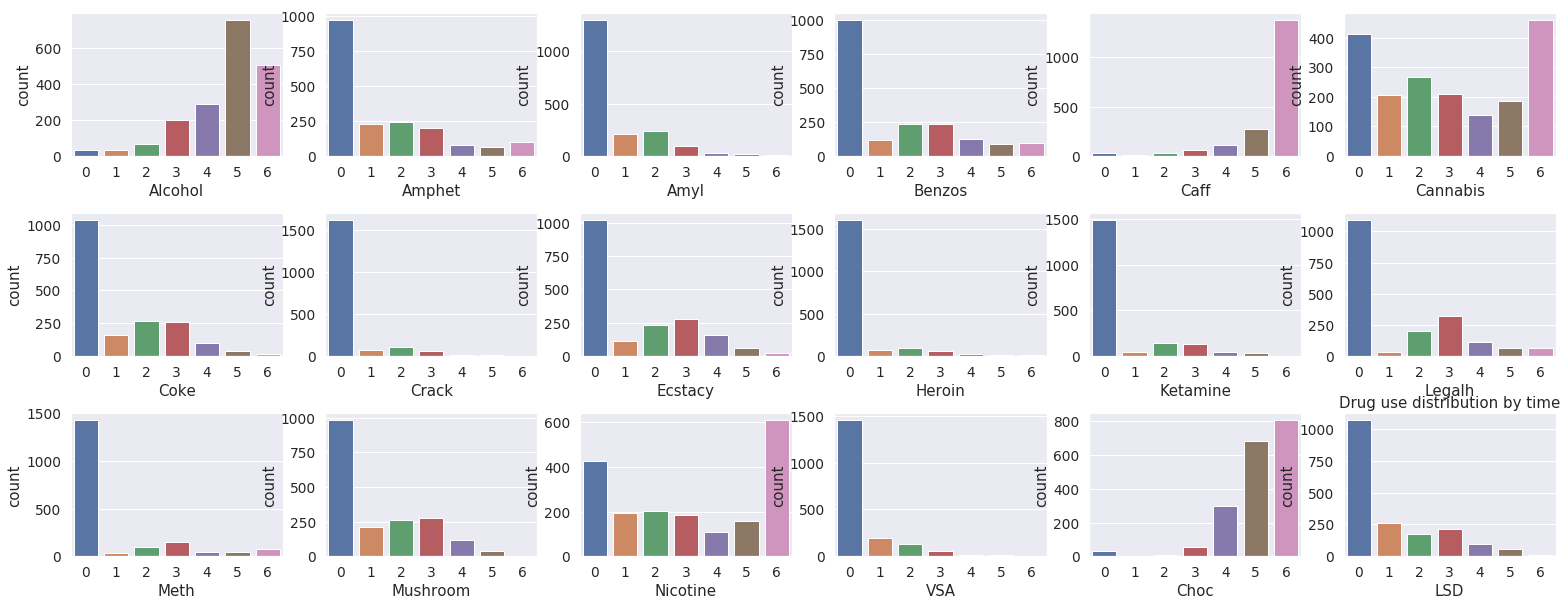

In [27]:
fig, ax =plt.subplots(3,6)

sns.countplot(drug['Alcohol'], ax=ax[0,0])
sns.countplot(drug['Amphet'], ax=ax[0,1])
sns.countplot(drug['Amyl'], ax=ax[0,2])
sns.countplot(drug['Benzos'], ax=ax[0,3])
sns.countplot(drug['Caff'], ax=ax[0,4])
sns.countplot(drug['Cannabis'], ax=ax[0,5])
sns.countplot(drug['Choc'], ax=ax[2,4])
sns.countplot(drug['Coke'], ax=ax[1,0])
sns.countplot(drug['Crack'], ax=ax[1,1])
sns.countplot(drug['Ecstacy'], ax=ax[1,2])
sns.countplot(drug['Heroin'], ax=ax[1,3])
sns.countplot(drug['Ketamine'], ax=ax[1,4])
sns.countplot(drug['Legalh'], ax=ax[1,5])
sns.countplot(drug['LSD'], ax=ax[2,5])
sns.countplot(drug['Meth'], ax=ax[2,0])
sns.countplot(drug['Mushroom'], ax=ax[2,1])
sns.countplot(drug['Nicotine'], ax=ax[2,2])
sns.countplot(drug['VSA'], ax=ax[2,3])
fig.set_size_inches(15, 10)
plt.subplots_adjust(right = 1.5, hspace=0.4)
plt.title('Drug use distribution by time')
#0 - never used, 1 - used over a decade ago, 2 - used in last decade, 3 - used in last year, 4 - used in last month, 5 - used in last week, 6 - used in last day 

#some feature enginering - I will do binary regrouping: 0 and 1 will be non user and 3 - 6 will be user

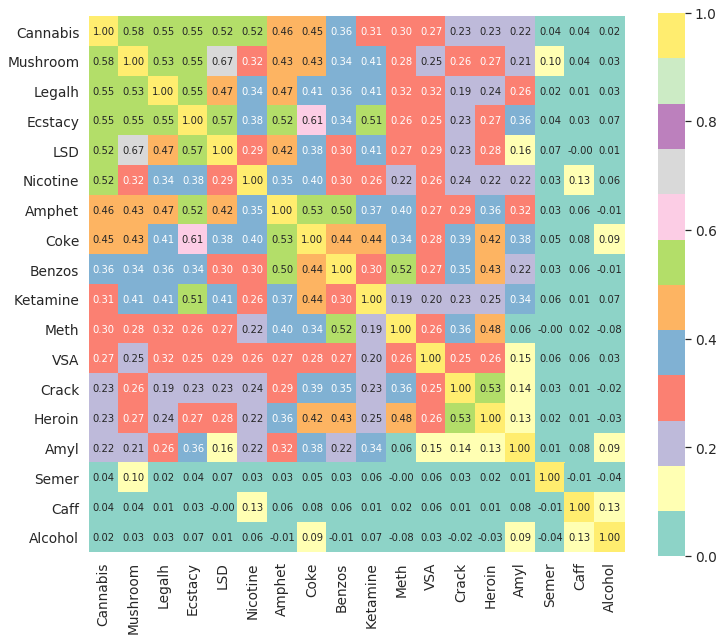

In [28]:
corrmat = drug.corr()
k = 18 #number of variables for heatmap
cols = corrmat.nlargest(k, 'Cannabis')['Cannabis'].index

#cols =cols.drop(['STDs: Time since first diagnosis','STDs: Time since last diagnosis'])

drug_d = drug[cols].corr()

plt.figure(figsize=(12,10))

sns.set(font_scale=1.25)
hm = sns.heatmap(drug_d,cmap = 'Set3', cbar=True, annot=True,vmin=0,vmax =1, square=True, fmt='.2f', annot_kws={'size': 10},
                 yticklabels = cols.values, xticklabels = cols.values)
plt.show()

In [29]:
drug_use = {0: 0, 1: 0, 2:1, 3:1, 4:1, 5:1, 6:1}
drug.replace(drug_use, inplace=True)
#reencoding drug use as either 0 - non user and 1 - user

/home/yomi/anaconda3/lib/python3.6/site-packages/pandas/core/frame.py:3798: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  method=method)


In [30]:
drug.head()

,Alcohol,Amphet,Amyl,Benzos,Caff,Cannabis,Choc,Coke,Crack,Ecstacy,Heroin,Ketamine,Legalh,LSD,Meth,Mushroom,Nicotine,Semer,VSA
0,1,1,0,1,1,0,1,0,0,0,0,0,0,0,0,0,1,0,0
1,1,1,1,0,1,1,1,1,0,1,0,1,0,1,1,0,1,0,0
2,1,0,0,0,1,1,1,0,0,0,0,0,0,0,0,0,0,0,0
3,1,0,0,1,1,1,1,1,0,0,0,1,0,0,0,0,1,0,0
4,1,0,0,0,1,1,1,0,0,0,0,0,0,0,0,1,1,0,0


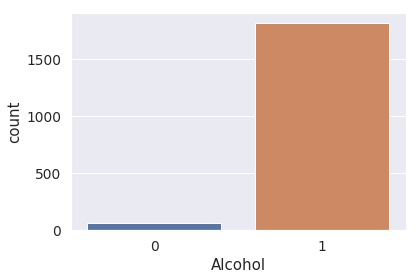

In [31]:
sns.countplot(drug['Alcohol']) 

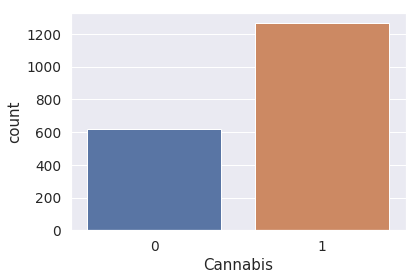

In [32]:
sns.countplot(drug['Cannabis'])

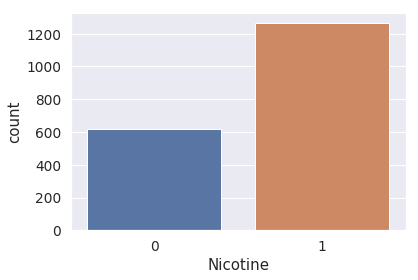

In [33]:
sns.countplot(drug['Nicotine']) 

## Building ML model and analysis of obtained results 
The correlation heat map shows some good correlation between certain groups of drugs which correspondings to the finding in the research paper attached to the end of the UCI dataset page.
In the paper, the drugs were grouped into three pleiad viz. - 

Heroin pleiad (crack, cocaine, meth and heroine), Ecstasy pleiad (Amphet, Cannabis, Cocaine, Ketamine, LSD, Magic Mushrooms, Legalh and ecstacy) and Benzos pleiad(Meth, Amp and cocaine).

Going forward i am going to work with Cannabis, Alcohol and Nicotine. Cannabis will cover all the other pleiads while Alcohol and Nicotine are not part of the pleiad and will thus be looked at separately.

So in general for the machine learning. I will classify as drug users or non-users. I will do this for three types - Alcohol, Nicotine and Cannabis(a representative of other drugs in pleiads).

For each i will test differe ML algos, build cross validation and show results.  I will analyzer the ML algos and say which performed best and give other comments as to workings. 

In [34]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.gaussian_process import GaussianProcessClassifier
from sklearn.metrics import f1_score, classification_report
from sklearn.model_selection import cross_val_score, KFold, cross_val_predict, train_test_split


In [35]:
y1 = drug['Cannabis']
y2 = drug['Crack']
y3 = drug['Nicotine']

#### For Cannabis 

In [37]:

kfold = KFold(n_splits=5, shuffle=True)
cv = kfold.split(X, y1)

#Logistic Regression
clf_LR = LogisticRegression()
scores = cross_val_score(clf_LR, X, y1, scoring='roc_auc', cv=cv)
print('KFold score for Logistic Regression: {0:.3f} ± {1:.3f}'.format(scores.mean(), scores.std()) )

#Using roc_auc for scoring because it is invariant under class distribution and can be applied to dataset with different distribution of class  as we have in our case. The best model will be the one with highest roc_auc score

KFold score for Logistic Regression: 0.862 ± 0.016


/home/yomi/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/home/yomi/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/home/yomi/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/home/yomi/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/home/yomi/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22.

In [38]:
#KNearestNeigbors
kfold = KFold(n_splits=5, shuffle=True)
cv = kfold.split(X, y1)
clf_KNN =  KNeighborsClassifier(n_neighbors=5)
scores = cross_val_score(clf_KNN, X, y1, scoring='roc_auc', cv=cv)
print('KFold score for  KNeighborsClassifier: {0:.3f} ± {1:.3f}'.format(scores.mean(), scores.std()) )

KFold score for  KNeighborsClassifier: 0.820 ± 0.015


In [39]:
#Random Forest
kfold = KFold(n_splits=5, shuffle=True)
cv = kfold.split(X, y1)
clf_RF = RandomForestClassifier(max_depth=25, random_state=42, n_estimators=100)
scores = cross_val_score(clf_RF, X, y1, scoring='roc_auc', cv=cv)
print('KFold score for Random Forest: {0:.3f} ± {1:.3f}'.format(scores.mean(), scores.std()) )



KFold score for Random Forest: 0.863 ± 0.015


In [40]:
#Finding best hyperparameter for Random Forest
from sklearn.model_selection import GridSearchCV
# Create the parameter grid 
#param_grid = {
 #   'bootstrap': [True],
  #  'max_depth': [20, 25, 35, 45, 55 ,65, 70, 80, 90, 100, 110],
   # 'max_features': [2, 3, 4, 5],
    #'min_samples_leaf': [3, 4, 5],
    #'min_samples_split': [8, 10, 12],
    #'n_estimators': [40, 50, 60, 80, 100, 200, 300, 500, 1000]}
# Create a based model
#rf = RandomForestClassifier()
# Instantiate the grid search model
#grid_search = GridSearchCV(estimator = rf, param_grid = param_grid, 
 #                         cv = 3, n_jobs = -1, verbose = 2)
#grid_search.fit(X, y1)
#grid_search.best_params_

In [41]:
#Gradient Boosting
kfold = KFold(n_splits=5, shuffle=True)
cv = kfold.split(X, y1)
clf_GB = GradientBoostingClassifier(max_depth=25, random_state=45, n_estimators=10)
scores = cross_val_score(clf_GB, X, y1, scoring='roc_auc', cv=cv)
print('KFold score for Gradient Boosting: {0:.3f} ± {1:.3f}'.format(scores.mean(), scores.std()) )


KFold score for Gradient Boosting: 0.712 ± 0.034


In [42]:
#Gaussian Process 
kfold = KFold(n_splits=5, shuffle=True)
cv = kfold.split(X, y1)
clf_GP = GaussianProcessClassifier()
scores = cross_val_score(clf_GP, X, y1, scoring='roc_auc', cv=cv)
print('KFold score for Gausian Process: {0:.3f} ± {1:.3f}'.format(scores.mean(), scores.std()) )

KFold score for Gausian Process: 0.835 ± 0.014


#### For Alcohol

In [43]:
kfold = KFold(n_splits=5, shuffle=True)
cv = kfold.split(X, y2)

#Logistic Regression
clf2_LR = LogisticRegression()
scores = cross_val_score(clf2_LR, X, y2, scoring='roc_auc', cv=cv)
print('KFold score for Logistic Regression: {0:.3f} ± {1:.3f}'.format(scores.mean(), scores.std()) )


KFold score for Logistic Regression: 0.735 ± 0.022


/home/yomi/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/home/yomi/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/home/yomi/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/home/yomi/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/home/yomi/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22.

In [44]:
#KNearestNeigbors
kfold = KFold(n_splits=5, shuffle=True)
cv = kfold.split(X, y2)
clf2_KNN =  KNeighborsClassifier(n_neighbors=5)
scores = cross_val_score(clf2_KNN, X, y2, scoring='roc_auc', cv=cv)
print('KFold score for  KNeighborsClassifier: {0:.3f} ± {1:.3f}'.format(scores.mean(), scores.std()) )

KFold score for  KNeighborsClassifier: 0.659 ± 0.034


In [45]:
#Random Forest
kfold = KFold(n_splits=5, shuffle=True)
cv = kfold.split(X, y2)
clf2_RF = RandomForestClassifier(max_depth=25, random_state=42, n_estimators=100)
scores = cross_val_score(clf2_RF, X, y2, scoring='roc_auc', cv=cv)
print('KFold score for Random Forest: {0:.3f} ± {1:.3f}'.format(scores.mean(), scores.std()) )



KFold score for Random Forest: 0.724 ± 0.023


In [46]:
#Gradient Boosting
kfold = KFold(n_splits=5, shuffle=True)
cv = kfold.split(X, y2)
clf2_GB = GradientBoostingClassifier(max_depth=25, random_state=45, n_estimators=10)
scores = cross_val_score(clf2_GB, X, y2, scoring='roc_auc', cv=cv)
print('KFold score for Gradient Boosting: {0:.3f} ± {1:.3f}'.format(scores.mean(), scores.std()) )


KFold score for Gradient Boosting: 0.584 ± 0.008


In [47]:
#Gaussian Process 
kfold = KFold(n_splits=5, shuffle=True)
cv = kfold.split(X, y2)
clf2_GP = GaussianProcessClassifier()
scores = cross_val_score(clf2_GP, X, y2, scoring='roc_auc', cv=cv)
print('KFold score for Gausian Process: {0:.3f} ± {1:.3f}'.format(scores.mean(), scores.std()) )

KFold score for Gausian Process: 0.607 ± 0.047


#### For Nicotine

In [48]:
kfold = KFold(n_splits=5, shuffle=True)
cv = kfold.split(X, y3)

#Logistic Regression
clf3_LR = LogisticRegression()
scores = cross_val_score(clf3_LR, X, y3, scoring='roc_auc', cv=cv)
print('KFold score for Logistic Regression: {0:.3f} ± {1:.3f}'.format(scores.mean(), scores.std()) )


KFold score for Logistic Regression: 0.760 ± 0.017


/home/yomi/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/home/yomi/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/home/yomi/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/home/yomi/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/home/yomi/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22.

In [49]:
#KNearestNeigbors
kfold = KFold(n_splits=5, shuffle=True)
cv = kfold.split(X, y3)
clf3_KNN =  KNeighborsClassifier(n_neighbors=5)
scores = cross_val_score(clf3_KNN, X, y3, scoring='roc_auc', cv=cv)
print('KFold score for  KNeighborsClassifier: {0:.3f} ± {1:.3f}'.format(scores.mean(), scores.std()) )

KFold score for  KNeighborsClassifier: 0.677 ± 0.024


In [50]:
#Random Forest
kfold = KFold(n_splits=5, shuffle=True)
cv = kfold.split(X, y3)
clf3_RF = RandomForestClassifier(max_depth=25, random_state=42, n_estimators=100)
scores = cross_val_score(clf3_RF, X, y3, scoring='roc_auc', cv=cv)
print('KFold score for Random Forest: {0:.3f} ± {1:.3f}'.format(scores.mean(), scores.std()) )



KFold score for Random Forest: 0.747 ± 0.025


In [51]:
#Gradient Boosting
kfold = KFold(n_splits=5, shuffle=True)
cv = kfold.split(X, y3)
clf3_GB = GradientBoostingClassifier(max_depth=25, random_state=45, n_estimators=10)
scores = cross_val_score(clf3_GB, X, y3, scoring='roc_auc', cv=cv)
print('KFold score for Gradient Boosting: {0:.3f} ± {1:.3f}'.format(scores.mean(), scores.std()) )


KFold score for Gradient Boosting: 0.596 ± 0.026


In [52]:
#Gaussian Process 
kfold = KFold(n_splits=5, shuffle=True)
cv = kfold.split(X, y3)
clf3_GP = GaussianProcessClassifier()
scores = cross_val_score(clf3_GP, X, y3, scoring='roc_auc', cv=cv)
print('KFold score for Gausian Process: {0:.3f} ± {1:.3f}'.format(scores.mean(), scores.std()) )

KFold score for Gausian Process: 0.725 ± 0.013


## Conclusion

The obtained result where interesting as cannabis which i thought of first had a very good score with the used metric showing it's ability to correctly classify the dataset. I was suprised at Nicotine coming in second as i expected Alcohol to be the second best.
I think further tweaking and finding best optimal hyperparameters might change things a little bit. 


In general, this model can be used in a real-life scenario for quick prediction but in order to make a much more enlighteningned classification we would need more data (that are not in the dataset) to better the workings of our model. Witht he current available data i think the model works just fine 
and if we have more test data of the same kind we can predict to such level of accuracy as obtained from the model.

Logistic Regression and Random Forest Classifier shows the best results in all algrithms considered and are recommended for use.

Tried to find best hyperparameters but too long to process and not so much significant difference from default so i used default settings